In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#General Imports
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, accuracy_score, average_precision_score
import random
from operator import itemgetter
from collections import Counter, defaultdict
import csv
import math
import operator
import pickle
import ast

#keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.models import load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [0]:
# File Imports
%cd '/content/gdrive/My Drive/BE Project/CLSTM /Files/'
import vectorization
import cnn_lstm
import helpers
import final_pred
import prediction_model

/content/gdrive/My Drive/BE Project/CLSTM /Files


In [0]:
data_path='/content/gdrive/My Drive/BE Project/CLSTM /Data/'

In [0]:
df_train_split= pd.read_csv(data_path+'Train splits/train_split_final.csv')
df_dev_split= pd.read_csv(data_path+'dev_split_num.csv')

In [0]:
df_test_split= pd.read_csv(data_path+'test_split_num.csv')

In [0]:
df_validation_split= pd.read_csv(data_path+'validation_split_num.csv')

In [0]:
MAX_SEQ_LENGTH= 5000

In [0]:
#------------CONVERTING TEXT COLUMN INTO 2-D ARRAY------------------------------------------------------------------

In [0]:
#------------RUN FOLLOWING CELL ONLY IF EXECUTING FOR FIRST TIME--------------------------------

In [0]:
df_train_split['TEXT'] = df_train_split['TEXT'].apply(ast.literal_eval)

In [0]:
df_test_split['TEXT'] = df_test_split['TEXT'].apply(ast.literal_eval)

In [0]:
df_dev_split['TEXT'] = df_dev_split['TEXT'].apply(ast.literal_eval)

In [0]:
df_validation_split['TEXT'] = df_validation_split['TEXT'].apply(ast.literal_eval)

In [0]:
def data_array(dataframe, MAX_SEQ_LENGTH):
  text = dataframe.TEXT
  l = len(text)
  data_arr = np.zeros((l, MAX_SEQ_LENGTH), dtype = int)
  for i in range(0, l):
    if i%1000 == 0:
      print(i)
    for j in range(0, MAX_SEQ_LENGTH):
      if text[i][j] == 'None':
        text[i][j] = '0'
      data_arr[i][j] = int(text[i][j])
  return data_arr

In [0]:
#--------FOR TRAINING SPLIT---------
data_train = data_array(df_train_split, MAX_SEQ_LENGTH)
np.savetxt('data_train.csv', data_train, delimiter=', ')

In [0]:
#--------FOR TEST SPLIT---------
data_test = data_array(df_test_split, MAX_SEQ_LENGTH)
np.savetxt(data_path+'data_test.csv', data_test, delimiter=', ')

In [0]:
#--------FOR DEV SPLIT---------
data_dev = data_array(df_dev_split, MAX_SEQ_LENGTH)
np.savetxt(data_path+'data_dev.csv', data_dev, delimiter=', ')

In [0]:
#--------FOR VAL SPLIT---------
data_val = data_array(df_validation_split, MAX_SEQ_LENGTH)
np.savetxt(data_path+'data_val.csv', data_val, delimiter=', ')

In [0]:
#-----END-------RUN FOLLOWING CELL ONLY IF EXECUTING FOR FIRST TIME------------------------------------

In [0]:
# -----LOAD DATA FROM CSV AS AN NPARRAY--------#
data_train = np.genfromtxt(data_path+'data_train.csv',delimiter=',')

In [0]:
data_test = np.genfromtxt(data_path+'data_test.csv',delimiter=',')

In [0]:
data_dev = np.genfromtxt(data_path+'data_dev.csv',delimiter=',')

In [0]:
data_val = np.genfromtxt(data_path+'data_val.csv',delimiter=',')

In [0]:
#-----END----CONVERTING TEXT COLUMN INTO 2-D ARRAY------------------------------------------------------------------

In [0]:
#----LOAD DICTIONARY AND EMBEDDING MATRIX------------------------------------------

In [0]:
#To load Dictionary
with open(data_path+'dictionary.pkl', 'rb') as f:
        dictionary = pickle.load(f)

In [0]:
MAX_VOCAB = len(dictionary)
EMBEDDING_DIM=200

In [0]:
# To Load Embedding Matrix
EMBEDDING_MATRIX = np.genfromtxt(data_path+'embedding_matrix.csv',delimiter=',')

In [0]:
#--END--LOAD DICTIONARY AND EMBEDDING MATRIX-----------------------------------------

In [0]:
#----------CONSTRUCTING ICD CODES ARRAY FOR VECTORIZATION----------#

In [0]:
#-----------CONSTRUCTING TOP 50 ICD Codes ARRAY For Defining Classes-----------#

In [0]:
#-----------ONLY EXECUTE FOR TOP 50----------------#

In [0]:
# For TOP 50
df_notes = pd.read_csv(data_path+'notes_labeled.csv')

In [0]:
try_labels=df_notes['LABELS']

In [0]:
try_labels

0        038.9;785.59;584.9;427.5;410.71;428.0;682.6;42...
1        042;136.3;799.4;276.3;790.7;571.5;041.11;V09.0...
2        403.91;444.0;997.2;276.6;276.7;285.9;275.3;V15...
3            431;507.0;428.0;584.9;276.5;401.9;96.72;96.04
4        V30.00;774.2;765.25;765.15;V29.0;99.83;99.15;96.6
                               ...                        
52721    038.9;518.81;482.41;487.0;785.52;V42.81;995.92...
52722    562.11;038.9;557.0;584.9;995.92;560.81;789.59;...
52723    999.9;568.81;577.2;285.1;584.9;579.9;729.92;53...
52724    441.4;428.33;998.12;285.1;424.1;250.00;998.11;...
52725    756.12;786.1;401.9;250.00;413.9;81.08;80.51;81...
Name: LABELS, Length: 52726, dtype: object

In [0]:
#counts by icd9_codes
icd9_codes = Counter()
for label in try_labels:
    label= str(label)
    l= label.split(';')
    for icd9_code in l:
      icd9_codes[icd9_code] += 1

In [0]:
icd9_codes

In [0]:
#Creating list of N=50 most common ICD cdes
listcommon= icd9_codes.most_common(n=50)

In [0]:
listcommon

[('401.9', 20053),
 ('38.93', 14444),
 ('428.0', 12842),
 ('427.31', 12594),
 ('414.01', 12179),
 ('96.04', 9932),
 ('96.6', 9161),
 ('584.9', 8907),
 ('250.00', 8784),
 ('96.71', 8619),
 ('272.4', 8504),
 ('518.81', 7249),
 ('99.04', 7147),
 ('39.61', 6809),
 ('599.0', 6442),
 ('530.81', 6156),
 ('96.72', 5926),
 ('272.0', 5766),
 ('285.9', 5296),
 ('88.56', 5240),
 ('244.9', 4788),
 ('486', 4733),
 ('38.91', 4575),
 ('285.1', 4499),
 ('36.15', 4390),
 ('276.2', 4358),
 ('496', 4296),
 ('99.15', 4172),
 ('995.92', 3792),
 ('V58.61', 3698),
 ('507.0', 3592),
 ('038.9', 3580),
 ('88.72', 3500),
 ('585.9', 3367),
 ('403.90', 3350),
 ('311', 3347),
 ('305.1', 3272),
 ('37.22', 3248),
 ('412', 3203),
 ('33.24', 3188),
 ('39.95', 3178),
 ('287.5', 3002),
 ('410.71', 3001),
 ('276.1', 2985),
 ('V45.81', 2943),
 ('424.0', 2878),
 ('45.13', 2849),
 ('V15.82', 2741),
 ('511.9', 2693),
 ('37.23', 2659)]

In [0]:
# Keeeping only ICD Codes in the list discarding their frequency
# This is the Final ICD Codes Array
ICD = list()
for item in listcommon:
  ICD.append(item[0])

In [0]:
len(ICD)

50

In [0]:
#---------------------END OF CONSTRUCTION OF TOP 50-------------------#

In [0]:
#-------------------ONLY EXECUTE FOR FULL LIST OF ICD CODES-------------#

In [0]:
# For all ICD Codes i.e. Full Dataset
df = pd.read_csv(data_path+'ALL_CODES_filtered.csv', dtype={"ICD9_CODE": str})

In [0]:
ICD = list()
ICD = list(df['ICD9_CODE'].unique())

In [0]:
len(ICD)

8922

In [0]:
#---------------------END OF CONSTRUCTION OF FULL ICD CODES-------------------#

In [0]:
#--END-----CONSTRUCTING ICD CODES ARRAY FOR VECTORIZATION----------#

In [0]:
#----------CONSTRUCTING Y_LABELS ARRAY FOR VECTORIZATION----------#

In [0]:
labels_train = vectorization.vectorize_icd_column(df_train_split, 'LABELS', ICD)

In [0]:
labels_test = vectorization.vectorize_icd_column(df_test_split, 'LABELS', ICD)

In [0]:
labels_dev = vectorization.vectorize_icd_column(df_dev_split, 'LABELS', ICD)

In [0]:
labels_val = vectorization.vectorize_icd_column(df_validation_split, 'LABELS', ICD)

In [0]:
np.savetxt(data_path+'labels_train.csv', labels_train, delimiter=', ')
np.savetxt(data_path+'labels_test.csv', labels_test, delimiter=', ')
np.savetxt(data_path+'labels_dev.csv', labels_dev, delimiter=', ')
np.savetxt(data_path+'labels_val.csv', labels_val, delimiter=', ')

In [0]:
#--END--------CONSTRUCTING Y_LABELS ARRAY FOR VECTORIZATION----------#

In [0]:
#----CONSTRUCTING MODEL------------------------------------------#

In [0]:
# DEPENDS ON THE LENGTH OF ICD CODE ARRAY
N_TOP= 8922

In [0]:
#BUILDING MODEL
clstm_model = cnn_lstm.build_clstm_model (input_seq_length=MAX_SEQ_LENGTH, max_vocab = MAX_VOCAB,
                                          embedding_dim=EMBEDDING_DIM,embedding_matrix=EMBEDDING_MATRIX,      
                                          num_classes=N_TOP)

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 200)         30097200  
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000, 200)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4996, 100)         100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 70)                47880     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3550      
Total params: 30,248,730
Trainable params: 151,530
Non-trainable params: 30,097,200
_____________________

In [0]:
# TRAINING MODEL
print('Train...')
clstm_model.fit(data_train, labels_train, batch_size=50,
                epochs=15, validation_data=(data_dev, labels_dev),verbose=1)

Train...
Train on 47722 samples, validate on 1631 samples
Epoch 1/15
47722/47722 [==============================] - 467s 10ms/step - loss: 0.3000 - accuracy: 0.8933 - val_loss: 0.2822 - val_accuracy: 0.8949
Epoch 2/15
47722/47722 [==============================] - 469s 10ms/step - loss: 0.2451 - accuracy: 0.9085 - val_loss: 0.2506 - val_accuracy: 0.9058
Epoch 3/15
47722/47722 [==============================] - 459s 10ms/step - loss: 0.2213 - accuracy: 0.9156 - val_loss: 0.2326 - val_accuracy: 0.9104
Epoch 4/15
47722/47722 [==============================] - 452s 9ms/step - loss: 0.2070 - accuracy: 0.9191 - val_loss: 0.2158 - val_accuracy: 0.9150
Epoch 5/15
47722/47722 [==============================] - 452s 9ms/step - loss: 0.1947 - accuracy: 0.9227 - val_loss: 0.2042 - val_accuracy: 0.9200
Epoch 6/15
47722/47722 [==============================] - 454s 10ms/step - loss: 0.1880 - accuracy: 0.9250 - val_loss: 0.1975 - val_accuracy: 0.9226
Epoch 7/15
47722/47722 [==========================

In [0]:
#MODEL SAVED
clstm_model.save(data_path+'clstm_top50_15epochs.h5')

In [0]:
#RELOAD MODEL top50
clstm_model= load_model(data_path+'clstm_top50_20epochs.h5')

In [0]:
#RELOAD MODEL FULL ICD
clstm_model= load_model(data_path+'clstm_full_50_20.h5')

3372/3372 [==============================] - 5s 1ms/step
Average Precision Score for Test Set: 0.2553553666536417

Average Accuracy Score for Test Set: 0.997492935346102

Average Recall Score for Test Set: 0.24080366305132092



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


,SUBJECT_ID,HADM_ID,ACTUAL LABELS,PREDICTED LABELS
0,89109,144591,"038.9, 584.9, 428.0, 96.04, 96.72, 38.93, 96.6...","038.9, 584.9, 428.0, 96.04, 96.72, 38.93, 96.6..."
1,89112,183380,"410.71, 428.0, 401.9, 414.01, 250.00, 272.0, 2...","410.71, 428.0, 401.9, 414.01, 250.00, 272.0, 2..."
2,89119,180906,"584.9, 428.0, 38.93, 403.91, 276.7, 285.9, 99....","584.9, 428.0, 38.93, 403.91, 276.7, 285.9, 99...."
3,89119,187268,"584.9, 428.0, 38.93, 403.91, 276.7, 285.9, 99....","584.9, 428.0, 38.93, 403.91, 276.7, 285.9, 99...."
4,89119,191630,"584.9, 428.0, 38.93, 403.91, 276.7, 285.9, 99....","584.9, 428.0, 38.93, 403.91, 276.7, 285.9, 99...."
5,89124,123322,"401.9,","401.9,"
6,89124,189821,"401.9, 272.4, 530.81, 285.1,","401.9, 272.4, 530.81, 285.1,"
7,89126,133403,"96.04, 38.93, 507.0, 401.9, 96.71, 599.0, 486,...","96.04, 38.93, 507.0, 401.9, 96.71, 599.0, 486,..."
8,89129,158799,"401.9, 272.4, 530.81,","401.9, 272.4, 530.81,"
9,89132,198797,"584.9, 401.9, 250.00, 272.4, 599.0, 427.31, 24...","584.9, 401.9, 250.00, 272.4, 599.0, 427.31, 24..."


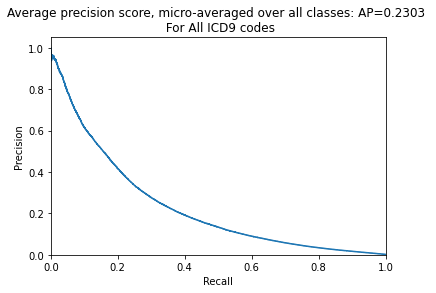

In [0]:
#Complete Prediction Output for TEST Data
predicted_data_test = prediction_model.prediction(clstm_model, data_test, labels_test, ICD, df_test_split)
predicted_data_test.head(10)

20/20 [==============================] - 0s 2ms/step
Average Precision Score for Test Set: 0.25583995180205676

Average Accuracy Score for Test Set: 0.9972147500560412

Average Recall Score for Test Set: 0.23678069238266608



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


,SUBJECT_ID,HADM_ID,ACTUAL LABELS,PREDICTED LABELS
0,83607,127964,"584.9, 428.0, 38.93, 96.6, 403.91, 276.7, 99.0...","584.9, 428.0, 38.93, 96.6, 403.91, 276.7, 99.0..."
1,83607,156758,"038.9, 584.9, 428.0, 38.93, 96.6, 403.91, 276....","038.9, 584.9, 428.0, 38.93, 96.6, 403.91, 276...."
2,84394,115729,"584.9, 428.0, 96.04, 96.72, 38.93, 96.6, 285.9...","584.9, 428.0, 96.04, 96.72, 38.93, 96.6, 285.9..."
3,84399,171890,"584.9, 96.04, 96.72, 38.93, 96.6, 285.9, 99.04...","584.9, 96.04, 96.72, 38.93, 96.6, 285.9, 99.04..."
4,84748,180964,"401.9, 250.00, 272.4, 530.81,","401.9, 250.00, 272.4, 530.81,"
5,84749,180018,"584.9, 428.0, 96.04, 38.93, 403.91, 276.7, 285...","584.9, 428.0, 96.04, 38.93, 403.91, 276.7, 285..."
6,84750,120107,"401.9, 272.4, 530.81,","401.9, 272.4, 530.81,"
7,85138,155979,"584.9, 428.0, 38.93, 401.9, 311, 272.4, 599.0,","584.9, 428.0, 38.93, 401.9, 311, 272.4, 599.0,"
8,85141,168842,"038.9, 584.9, 428.0, 96.04, 38.93, 96.6, 99.04...","038.9, 584.9, 428.0, 96.04, 38.93, 96.6, 99.04..."
9,85143,180486,"584.9, 410.71, 428.0, 96.04, 96.72, 38.93, 96....","584.9, 410.71, 428.0, 96.04, 96.72, 38.93, 96...."


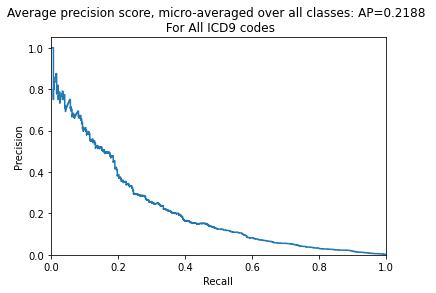

In [0]:
#Complete Prediction Output for validation data
predicted_data_val = prediction_model.prediction(clstm_model, data_val, labels_val, ICD, df_validation_split)
predicted_data_val.head(10)

In [0]:
# SAVE PREDICTED DATA TEST
predicted_data_test.to_csv(data_path+'Results/FULL_50-20_TEST_PRED.csv')

In [0]:
# SAVE PREDICTED DATA VAL
predicted_data_val.to_csv(data_path+'Results/FULL_50-20_VAL_PRED.csv')